DS 420<Br>
Project 2 - Loan Data Set<br><br>
Authors :
 - Casey Kellett Whitwham
 - Evan Marinov

---

Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

import importlib
import SummaryPlots as summ
importlib.reload(summ)

<module 'SummaryPlots' from 'c:\\Users\\casey\\OneDrive\\Project 1 - Casey & Evan\\Project 2\\SummaryPlots.py'>

In [26]:
results=pd.read_csv("Results.csv")
results.sort_values(by=['Accuracy'],ascending=False)


,Model,Accuracy,Project
4,GradientBoostingClassifier,93.19,2
3,Stacking,93.15,2
5,HistGradientBoostingClassifier,93.03,2
7,RandomForest,92.51,2
6,BaggingClassifier,92.37,2
8,Casey DNN,92.00,2
9,Evan DNN,91.45,2
0,DecisionTree,91.16,1
2,LogisticRegression,87.49,1
1,LinearSVC,83.82,1


--- 

#### Goals <br>
We were unable to get accurate comparison goals for this project due to the source not having other entries(not kaggle).

- **We had three main metrics we aimed to hit:**<br><br>
    - Have all models perform higher than the top model from project 1 (Decision Tree: 91.16% Test Acc)
    - Have the average accuracy for project 2 be 5% higher than the average accuracy of project  1.
    - Create two DNNs with differing implementation methodologies.

---

**Goal 1: Have all models perform higher than the top model from Project 1 (Decision Tree: 91.16% Test Acc)**

As shown in the table below, all models in Project 2 have exceeded the performance of the Decision Tree from Project 1 (91.16%). This demonstrates that the models in Project 2 are stronger overall, with more advanced techniques such as Gradient Boosting and DNN models contributing to higher performance. 

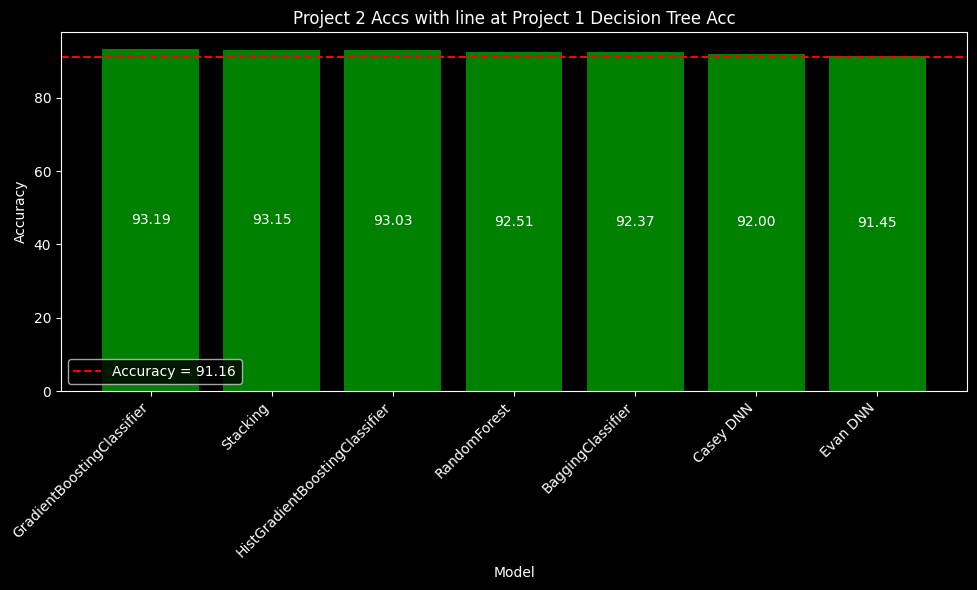

In [27]:
summ.dtcomp(results)

---

**Goal 2: Have the average accuracy for project 2 be 5% higher than the average accuracy of project  1.**

 - With a difference of 5.04% we successfully completed this goal. Showing the improvements more advanced models can give.

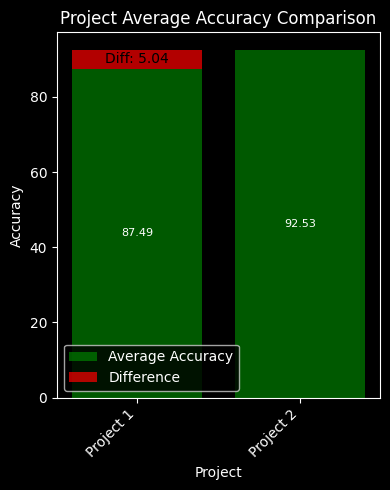

In [28]:
summ.Project_Averages(results)

---
Goal 3: Create two DNNs with differing implementation methodologies.


 - **Dnn 1: Evan**
     - In order to show the range of methodologies we can use to create a DNN, I manually defined each layer of the model. In my best model, I achieved a Test Accuracy of 91.45%, above the goal of 91.16%

    - This was done with:

         - Optimizer: Adam
         - Batch size: 32
         - Epochs: 100
         - Four Hidden Layers:
             - 1st (256 Neurons, activation='relu', L2 regularization with a rate of 0.01)
             - 2nd (128 Neurons, activation='relu', L2 regularization with a rate of 0.01)
             - 3rd (64 Neurons, activation='relu', L2 regularization with a rate of 0.01)
             - 4th (32 Neurons, activation='relu', L2 regularization with a rate of 0.01)
         - BatchNormalization: Applied after each hidden layer to normalize the activations.
         - Dropout: 40% dropout rate after the first hidden layer, 30% dropout rate after the subsequent layers.
         - Learning rate: ReduceLROnPlateau

 - **DNN 2: Casey**
    - For this project, I aimed to enhance the efficiency of random search by reducing the likelihood of missing an optimal parameter combination. To achieve this, I developed a function that refines the search process iteratively. The function takes the number of search iterations as input and proceeds as follows:
      1. Initial Random Search
            - The function starts by performing an initial random search.
            - It selects the top 25% of parameter sets based on their performance. 
            - The number of top sets is determined by the formula: ```int((max_trials * 0.15) / iteration_number)```.
               - Iteration 1: Top 25%
               - Iteration 2: Top 12.5%
               - Iteration 3: Top 8.33%
               - Etc.
      2. Parameter Range Extraction
         - Once the top-performing parameter sets are identified, the function creates an array of the minimum and maximum values for each parameter across these top trials.
      3. Refined Search
         - These extracted parameter ranges are then used in the next iteration of random search.
         - With each iteration, the step size for each parameter is halved resulting in a finer search within a more focused range.
      4. Iteration
         - This process is then repeated using the value specified on input 

   - After this iterative randomsearch, I passed the refined param range to a hyperband search to further optimize the process.
   - The best model was then evaluated using the test set and the first 10 observations of the test set were predicted for a visual representation of the accuracy.

   - ***Results***
       - **Test Accuracy:** 92%
       - **Params:**
          - **n_layers:** 3
          - **n_neurons:** 644
          - **learning_rate:** 0.000540839799142703
          - **decay_steps:** 5217
          - **decay_rate:** 0.10250000000000001
          - **dropout_rate:** 0.1512
          - **batch_norm:** 0
          - **Optimizer:** adam
          - **Activation:** relu
          - **BatchSize:** 4096
          - **Epochs:**  7



---
Further Analysis

Overall both DNNs and Ensemble Learning Methods performed better than the models from project 1 by around 4-5% suggesting an improvement in accuracy and predictive power when using more advanced techniques.

However, DNNs still lagged behind all of the ensemble learning models by on average about 1%.This is most likely due to the lack of complexity in the dataset, with ensemble methods being a better fit.

In [29]:
summ.groups(results)

,Group,Accuracy
0,BasicModels,87.490
1,DNN,91.725
2,Ensemble,92.850
